# How does window to wall ratio size affect the temperature of a room over the course of a typical October day in Massachusetts?

Annie Chu and Annie Tor

ModSim Studio 1

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [ ]:
'''
10/27/18 A Productive Meeting!!!

Refined question: How does the window size of a set wall area affect the temperature of a room over the course of a typical October day?

What we call a typical October day will be based off data for October 15th. 
We will be taking data from the outside and finding the equation of best fit for that data using the interpolate function.
Our model will use the differential equation 
dH/dt of plaster = (outside temperature - inside temperature) * area of plaster wall / R-value of plaster wall
dH/dt of window = (outside temperature - inside tempreature) * area of window / R-value of window
The outside temperature will come from our function based on outside data.
The first value for inside temperature will be hard-coded to typical room temperature, and all following values will be found recursively. 
The area of the plaster wall will come from the difference between a predetermined total wall area and the window area.
The area of the window will be swept across a range of values from 0 to a predetermined total wall area.
The R-value of the wall will be based off typical R-values for exterior walls and windows.

To find the inside temperature, we will convert our dH/dt values from heat energy units to temperature units, then add them to the previous inside temperature.

Since we only want to focus on the change of temperature over a day, t0 will be 0 (midnight) and t_end will be 24 (midnight of the next day).

We assume that the window and the plaster will act independently of each other. 
We are also assuming that there is essentially no effect from the Sun, meaning that no thermal energy coming directly from the Sun will be considered. To justify this assumption, our hypothetical window will be North-facing (away from the Sun).
'''

In [9]:
def make_system(window_size, total_size, window_insulation, wall_insulation):
    '''
    wall_size = total_size - window_size
    
    window is north-facing (sun therefore has essentially no effect)
    DAY: Oct 15th
    sunrise: 7:00
    sunset: 6:00
    
    1)solar energy comes in watts
    2)convert to joules
    3)from solar energy in joules, take 54% for thermal energy, the rest goes to light (not accounting for light energy absorbed by material)
    4)thermal energy going into room varies with the window to wall ratio size as it changes the insulation value (window_insulation and wall_insulation values affect R)
    initial temperature outside at midnight: 
    initial temperature inside the room at midnight:
    temperature difference between outside and inside affects rate of thermal energy flow IN (and out, but that's a later problem)
    '''
    init = State(tempoutside=200, tempinside=0)
    t0 = 0
    t_end = 24
    dt = 0.5
    return System(init=init, t0 = 0, t_end = t_end, dt = dt, gamma=gamma, 
                  tau=tau, mu=mu, beta=beta,
                  alpha=alpha, rho=rho, sigma=sigma, 
                  delta=delta, pi=pi)

In [3]:
def update_func(state, t, system):
    R, L, E, V = state
    unpack(system)
    
    dRdt = (gamma * tau) - (mu * R) - (beta * R * V)
    dLdt = (rho * beta * R * V) - (mu * L) - (alpha * L)
    dEdt = ((1-rho) * beta * R * V) + (alpha * L) - (delta * E)
    dVdt = (pi * E) - (sigma * V)
    
    R += dRdt * dt
    L += dLdt * dt
    E += dEdt * dt
    V += dVdt * dt
    
    return State(R=R, L=L, E=E, V=V)

In [4]:
system = make_system(1.36, 0.2, 0.00136, 0.00027, 0.036, 0.1, 2, 0.33, 100)

,values
init,R 2.000000e+02 L 0.000000e+00 E 0.000...
t0,0
t_end,120
dt,0.5
gamma,1.36
tau,0.2
mu,0.00136
beta,0.00027
alpha,0.036
rho,0.1


In [5]:
def run_simulation(system, update_func):
    unpack(system)
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    for t in linrange(t0, t_end, dt):
        frame.row[t+dt] = update_func(frame.row[t], t, system)
        
    return frame

In [6]:
results = run_simulation(system, update_func)

,R,L,E,V
0.0,200.000000,0.000000e+00,0.000000e+00,4.000000e-07
0.5,200.000000,1.080000e-09,9.720000e-09,0.000000e+00
1.0,200.000000,1.059826e-09,8.135640e-09,4.860000e-07
1.5,200.000000,2.352228e-09,1.862214e-08,4.067820e-07
2.0,200.000000,3.406600e-09,2.547663e-08,9.311068e-07
2.5,200.000000,5.856953e-09,4.396020e-08,1.273831e-06
3.0,200.000000,9.186890e-09,6.776629e-08,2.198010e-06
3.5,200.000000,1.494991e-08,1.101619e-07,3.388315e-06
4.0,200.000000,2.381909e-08,1.745903e-07,5.508093e-06
4.5,200.000000,3.824600e-08,2.800583e-07,8.729515e-06


In [7]:
def plot_results(R,L,E):
    plot(R, 'm-', label = "R")
    plot(L, 'g:', label = "L")
    plot(E, 'b-', label = "E")
    decorate(title = "HIV",
            xlabel = "Time",
            ylabel = "Number of Cells")

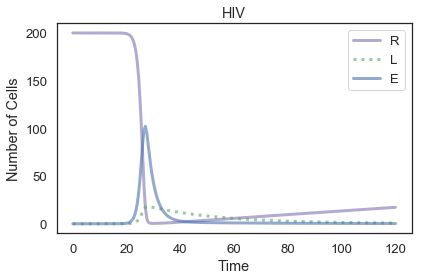

In [8]:
plot_results(results.R,results.L,results.E)